In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')

In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [5]:
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [6]:
standardscaler_x = StandardScaler()
x = standardscaler_x.fit_transform(x)
standardscaler_y = StandardScaler()
y = standardscaler_y.fit_transform(y)

In [7]:
y = y.reshape(len(y),)

In [8]:
regressor = SVR(kernel='poly')
regressor = regressor.fit(x,y)

In [9]:
test = np.zeros(1) # we are testing just one value
test[0]= 6.5
test = test.reshape(1,1) # reshape to 2D array!
test = standardscaler_x.transform(test) # rescaling test data like train data

In [10]:
y_pred = regressor.predict(test)
y_pred = y_pred.reshape(-1,1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


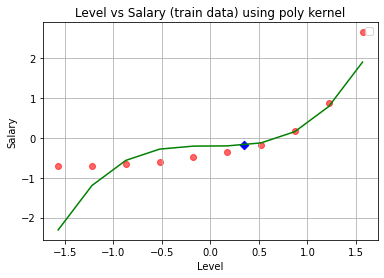

In [11]:
y_predict = standardscaler_y.inverse_transform(y_pred)
plt.scatter(x,y, color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(x,regressor.predict(x),color='green')
plt.title('Level vs Salary (train data) using poly kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

In [12]:
regressor2 = SVR(kernel='rbf')
regressor2 = regressor2.fit(x,y)

In [13]:
y_pred = regressor2.predict(test)
y_pred = y_pred.reshape(-1,1)

In [14]:
y_predict = standardscaler_y.inverse_transform(y_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


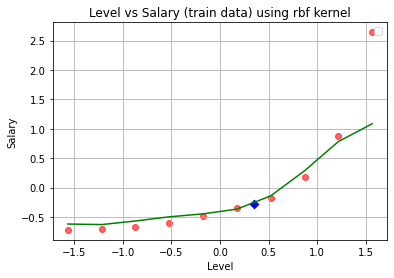

In [15]:
plt.scatter(x,y, color ='red', alpha=0.6)
plt.scatter(test,y_pred,color = 'blue', marker='D')
plt.plot(x,regressor2.predict(x),color='green')
plt.title('Level vs Salary (train data) using rbf kernel')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()